В этой части вам предстоит реализовать первое разбиение в решающем дереве своими руками.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (11, 6.5)

Импортируем данные.

In [3]:
boston = load_boston()

Описание данных:

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Данные представлены в виде словаря, у которого есть следующие ключи:

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Представим данные в виде `pandas.DataFrame`, также добавим в них целевую переменную.

In [6]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
X['target'] = boston['target']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Распределение целевой переменной:

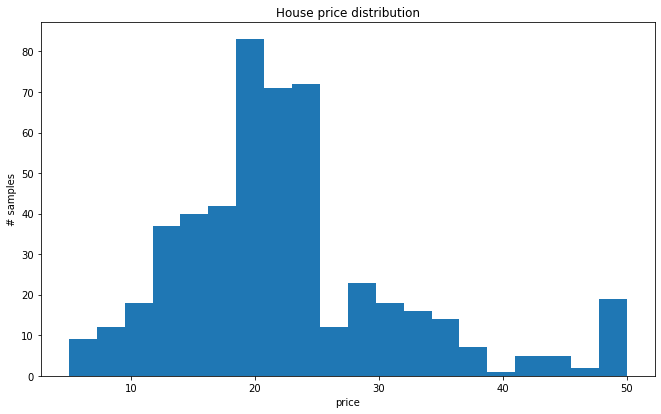

In [7]:
plt.title('House price distribution')
plt.xlabel('price')
plt.ylabel('# samples')
plt.hist(X['target'], bins=20)
plt.show()

Напомним, как ищется разбиение в конкретной вершине. Пусть мы выбрали какой-то признак и порог. Обозначим $R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки выглядит следующим образом:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t},
$$

где $R_\ell$ - множество объектов в левой вершине (поддереве), $R_r$ - множество объектов в правой вершине (поддереве), $|R|$ - число объектов в множестве $R$, а $H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$. Например, в случае классификации $H(R)$ может быть выражено энтропией, а в случае регрессии - дисперсией.

Мы хотим минимизировать $Q(R_m, j, t)$ по $j$ и $t$ - то есть подобрать такие $j$ и $t$, что для них значение $Q(R_m, j, t)$ будет минимальным.

## 1 

Реализуйте функцию подсчета критерия информативности. В данном случае мы решаем задачу регрессии, так что используйте дисперсию значений целевой переменной (колонка 'target').

Сделайте так, чтобы даже для пустой таблицы (в которой нет ни одного объекта) выдавался численный ответ - 0, а не NaN. Возможно, в этом вам поможет функция `np.nan_to_num`.

In [8]:
def H(R):
    """
    INPUT
    R - pd.DataFrame - характеризует собой набор объектов в вершине. В нашем случае R - это будет подмножество объектов из
    изначальной таблицы X
    
    OUTPUT
    H(R) - значение критерия информативности (дисперсия значений целевой переменной объектов в вершине)
    """
    pass

assert np.allclose(H(X), 84.5867235940986)
assert np.allclose(H(pd.DataFrame(columns=X.columns)), 0.0)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## 2 

Реализуйте функцию, которая разобьет объекты в данной вершине на две группы по заданному признаку feature и порогу t. Пусть в левую вершину попадут объекты, у которых значение feature <= t, а в правую - у которых значение feature > t.

In [9]:
def split_node(R_m, feature, t):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    t - float - порог признака feature, по которому разбиваем данные
    
    OUTPUT
    R_l - pd.DataFrame - объекты, которые попали в левую вершину
    R_r - pd.DataFrame - объекты, которые попали в правую вершину
    """
    R_l = None
    R_r = None
    return R_l, R_r

R_l, R_r = split_node(X, 'ZN', 6.0)
assert np.allclose(H(R_l), 73.7555971219894)
assert np.allclose(H(R_r), 70.64116541353386)
assert R_l['ZN'].max() <= 6.0
assert R_r['ZN'].min() > 6.0

## 3 

Реализуйте функцию, подсчитывающую значение критерия ошибки. Разделите данные по заданным признаку и порогу, посчитайте значения критериев информативности в полученных вершинах и получите результат по формуле в начале задания.

In [10]:
def q_error(R_m, feature, t):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    t - float - порог признака feature, по которому разбиваем данные
    
    OUTPUT
    Q - float - значение критерия ошибки
    """
    Q = None
    return Q

assert np.allclose(q_error(X, 'ZN', 6.0), 72.93082666955256)

## 4

Теперь, когда основные функции реализованы, можно перейти к непосредственному поиску оптимальных признака и порога. Для начала реализуйте функцию, с помощью которой можно найти оптимальный порог для разбиения вершины с помощью заданного признака. В качестве пороговых значений можно перебрать все уникальные значения признака, посчитать для каждого значение критерия ошибки, а затем выбрать пороговое значение, соответствующее наименьшему значению критерия ошибки.

In [11]:
def get_optimal_t(R_m, feature):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    
    OUTPUT
    t_opt - float - оптимальное значение порога (для которого значение критерия ошибки минимально)
    t_array - list - список перебираемых пороговых значений
    Q_array - list - список значений критерия ошибки, соответствующих перебранным пороговым значениям (для построения графика)
    """
    Q_array = None
    t_array = None
    t_opt = None
    return t_opt, t_array, Q_array

t_opt, t_array, Q_array = get_optimal_t(X, 'CRIM')
assert np.allclose(t_opt, 6.65492)

Выведите график зависимости значения критерия ошибки от порогового значения при разбиении вершины по признаку 'CRIM'.

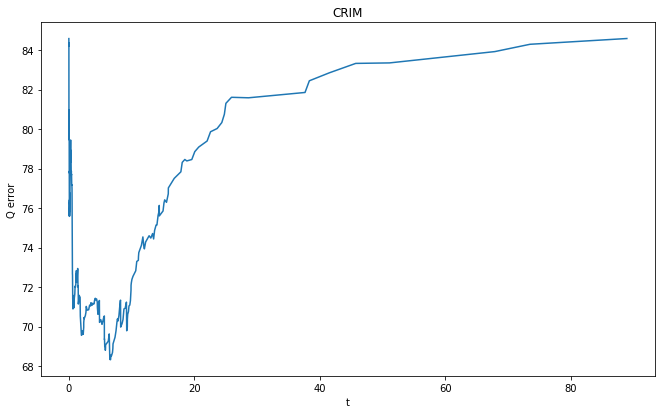

In [12]:
# your code here

## 5

Теперь реализуйте функцию, с помощью которой можно определить также оптимальный признак. Внутри функции пройдитесь циклом по всем признакам, для каждого вызовите `get_optimal_t`, найдите оптимальный порог и минимальное значение критерия ошибки. Сравните полученные результаты (признаки, пороги и значения критерия ошибки для них) и выберите признак с порогом, соответствующие наименьшему значению критерия ошибки.

**ИСКЛЮЧИТЕ ИЗ РАССМОТРЕНИЯ КОЛОНКУ 'target', ЭТО НЕ ПРИЗНАК!**

In [13]:
def get_optimal_split(R_m):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    
    OUTPUT
    feature_opt - оптимальное значение признака для разбиения вершины
    t_opt - оптимальное значение порога для разбиения вершины
    """
    feature_opt = None
    t_opt = None
    return feature_opt, t_opt

feature_opt, t_opt = get_optimal_split(X)
print('Optimal feature:', feature_opt)
print('Optimal t:', t_opt)
assert feature_opt == 'RM'
assert np.allclose(t_opt, 6.939)

Optimal feature: RM
Optimal t: 6.939


# Часть 3 

В данной части будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data).

In [8]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [9]:
data = pd.read_csv('diabetes.csv')

In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.shape

(768, 9)

Распределение целевой переменной:

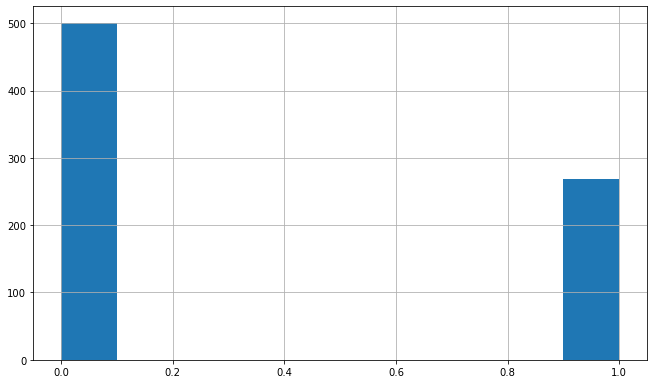

In [12]:
data['Outcome'].hist()
plt.show()

## 1

Разбейте выборку на обучающую и тестовую части в отношении 70:30. Не забудьте отделить целевую переменную от признаков (чтобы случайно не включить ее в обучение как признак).

In [42]:
# your code here

## 2 

Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на деревьях (параметр `base_estimator=DecisionTreeClassifier()`). Оцените качество классификации на тестовой выборке по метрикам accuracy, precision и recall.

In [ ]:
# your code here

## 3

Теперь обучите Random Forest с числом деревьев, равным 50. Оцените качество классификации по тем же метрикам. Какая из двух построенных моделей показала себя лучше?

In [ ]:
# your code here

## 4 

Для случайного леса проанализируйте значение AUC-ROC на этих же данных в зависимости от изменения параметров (можете сделать обычный перебор с обучением/тестированием в цикле):
* `'n_estimators'` (можно перебрать около 10 значений из отрезка от 10 до 1500)
* `'min_samples_leaf'` (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости AUC-ROC от этих параметров. Какие выводы вы можете сделать?

In [ ]:
# your code here